# FastSLAM

In [1]:
import sys
sys.path.append('../src')
import importlib


import numpy as np
import particles
import drawables

def reload():
    importlib.reload(particles)
    importlib.reload(drawables)


reload()

In [10]:
reload()
def trial(debuggable=False):
    time_interval = 0.1
    sim = drawables.Simulator(50., time_interval, debuggable=debuggable)
    
    m = drawables.DrawableMap()
    for ln in [(-4., 2.), (2., -3.), (3., 3.), (0., 4.), (4., 0.), (-4., 4), (-1., -3.), (-3., -1.), (-3., -3.)]:
        m.append_landmark(drawables.DrawablePoint2DLandmark(*ln))
    sim.append(m)
    
    initial_pose = np.array([0., 0., 0.4]).T
    est_map = drawables.DrawableMap()
    for i in range(len(m.landmarks())):
        est_map.append_landmark(drawables.DrawablePoint2DLandmarkEstimated())
    map_particles = \
        [
            # パーティクルは100こ，ランドマーク数は3
            # 真のマップのランドマーク数と対応
            particles.MapParticle(initial_pose, 1. / 100, est_map)
            for i in range(100)
        ]
    r = drawables.DrawableRealRobot(
        initial_pose,
        sensor=drawables.DrawableCamera(m),
        agent=drawables.DrawableEstimationAgent(
            time_interval,
            0.2,
            10./180.*np.pi,
            estimator=drawables.DrawableFastSlam(
                initial_pose,
                map_particles)),
        color='red')
    sim.append(r)
    
    sim.draw()

<IPython.core.display.Javascript object>


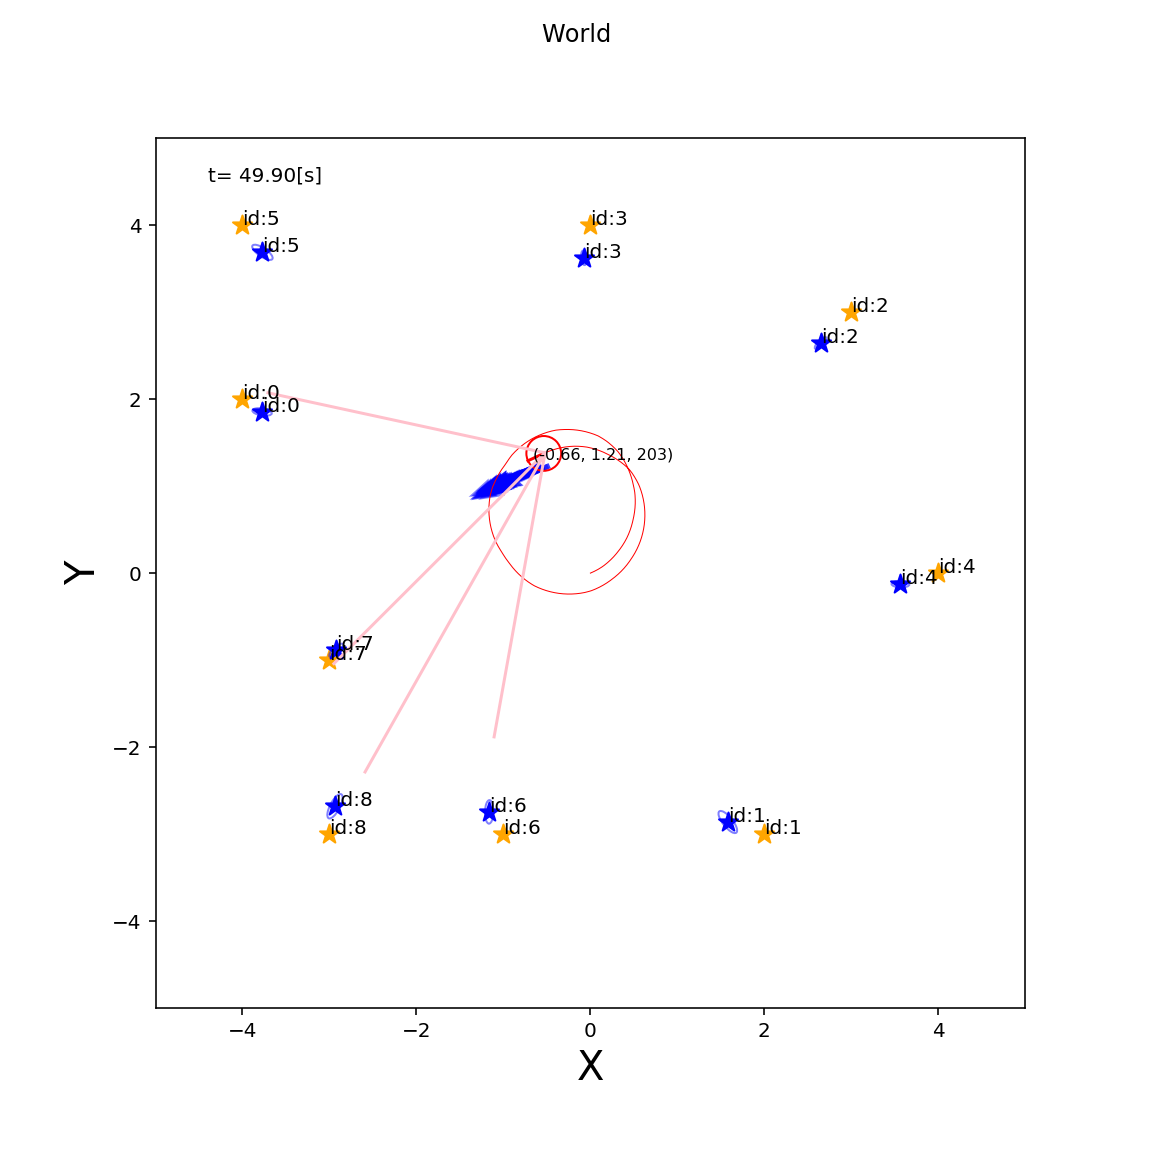

In [11]:
trial(debuggable=False)